# Initial value problem for ODEs

# I. Euler's method for a first order ODE

Consider a first order equation

$$
\frac{d u}{d t} = \lambda u
$$

with the initial condition $u(t=0) = u_0$.

Here is a simple illustration of solving this equation with the explicit Euler method.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
def euler_solve(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps + 1) * dt
    y = np.empty(num_steps + 1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt * lam * y[k]
    return tt, y

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5. ]
[1.         0.95       0.9025     0.857375   0.81450625 0.77378094
 0.73509189 0.6983373  0.66342043 0.63024941 0.59873694 0.56880009
 0.54036009 0.51334208 0.48767498 0.46329123 0.44012667 0.41812034
 0.39721432 0.3773536  0.35848592 0.34056163 0.32353354 0.30735687
 0.29198902 0.27738957 0.26352009 0.25034409 0.23782689 0.22593554
 0.21463876 0.20390683 0.19371148 0.18402591 0.17482461 0.16608338
 0.15777921 0.14989025 0.14239574 0.13527595 0.12851216 0.12208655
 0.11598222 0.11018311 0.10467395 0.09944026 0.09446824 0.08974483
 0.08525759 0.08099471 0.07694498]


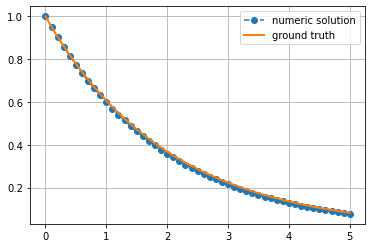

In [35]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
print(tt)
print(y)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Test I.1

Test the function above for varying step size $\tau$ (in the code it's `dt`), including $|\lambda| \tau > 1$? 

(10% of the grade)

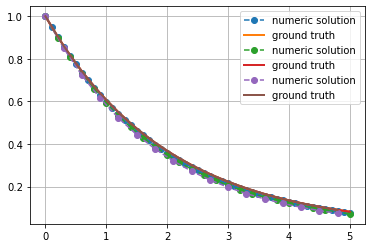

In [32]:
lam = -.5
dt = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0]
for i in range(3):
    tt1, y1 = euler_solve(lam, 1.0, 5, dt[i])
    #print(dt[i])
    #print(tt1)
    #print(y1)
    plt.plot(tt1, y1, 'o--', label='numeric solution')
    plt.plot(tt1, np.exp(lam*tt1), '-', lw=2, label='ground truth')
    plt.legend(loc='best')
    plt.grid(True)

### Test I.2

Implement a function for solving the same equation, $du/dt = \lambda u$ using the implicit Euler scheme. Compare the behavior of the implicit and explicit Euler schemes. Discuss.

(10% of the grade)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5. ]
[ 1.   -0.05 -0.1  -0.15 -0.2  -0.25 -0.3  -0.35 -0.4  -0.45 -0.5  -0.55
 -0.6  -0.65 -0.7  -0.75 -0.8  -0.85 -0.9  -0.95 -1.   -1.05 -1.1  -1.15
 -1.2  -1.25 -1.3  -1.35 -1.4  -1.45 -1.5  -1.55 -1.6  -1.65 -1.7  -1.75
 -1.8  -1.85 -1.9  -1.95 -2.   -2.05 -2.1  -2.15 -2.2  -2.25 -2.3  -2.35
 -2.4  -2.45 -2.5 ]


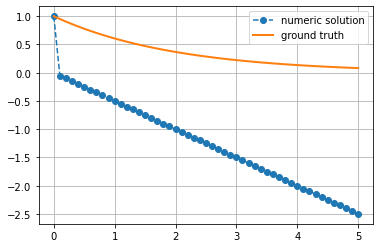

In [48]:
lam = -0.5

def implicit_euler(lam, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps + 1) * dt
    y = np.empty(num_steps + 1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = dt * lam * y[k+1] # I think this is the only changed line
    return tt, y

tt, y = implicit_euler(-.5, 1.0, 5, 0.1)
print(tt)
print(y)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

## II. Stiff systems.

Consider a system of two first order equations

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

where $\mathbf{u}$ is a two-dimensional vector, and $A$ is a known constant 2$\times$2 matrix.

Implement a generalization of `euler_solve` routine for solving a system of linear first-order equations with time-independent matrix $A$ using the explicit Euler's method.

In [74]:
def euler_solve(A, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps + 1) * dt
    y = []
    uT = np.transpose(u0)
    y.append(uT)
    for k in range(num_steps):
        y.append(y[k] + A @ y[k] * dt)
    return tt, y


[array([[0],
       [1]]), array([[0.1 ],
       [0.01]]), array([[0.091 ],
       [0.0321]]), array([[0.08511 ],
       [0.029441]]), array([[0.0795431 ],
       [0.02752961]]), array([[0.07434175],
       [0.02572909]]), array([[0.06948048],
       [0.02404665]]), array([[0.0649371 ],
       [0.02247422]]), array([[0.06069081],
       [0.02100461]]), array([[0.05672219],
       [0.01963111]]), array([[0.05301308],
       [0.01834741]]), array([[0.04954652],
       [0.01714766]]), array([[0.04630663],
       [0.01602636]]), array([[0.04327861],
       [0.01497839]]), array([[0.04044858],
       [0.01399894]]), array([[0.03780362],
       [0.01308354]]), array([[0.03533161],
       [0.01222799]]), array([[0.03302125],
       [0.0114284 ]]), array([[0.03086196],
       [0.01068108]]), array([[0.02884388],
       [0.00998264]]), array([[0.02695775],
       [0.00932987]]), array([[0.02519496],
       [0.00871978]]), array([[0.02354744],
       [0.00814959]]), array([[0.02200766],
       [

### Test II.1

Take 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

and the initial condition $\mathbf{u} = (1, 0)^T$.

Solve the system using a fixed step size $\tau=0.01$. Is the explicit Euler's method stable at this value of the step size?

Find eigenvalues of $A$ (use `np.linalg.eigvals`) and comment whether the system is stif.

(20% of the grade)

In [77]:
A = [[-10,10],[32,-99]]
u = [[0,1]]
tt, y = euler_solve(A, u, 5, .01)

eigA = np.linalg.eigvals(A)
print("Eigenvalues of A")
print(eigA)

[  -6.53907841 -102.46092159]


### Test II.2

Implement the $\textit{implicit}$ Euler's scheme for a system of first-order equations with constant coefficients. Note that at each time step you need to solve a system of linear algebraic equations, use `np.linalg.solve` for that.

Use this routine to solve the system from Test II.1 at the same step size $\tau=0.01$. Compare solutions obtained by an explicit and an implicit Euler's methods.

(20% of the grade)

In [ ]:
def euler_solve_implicit(A, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps + 1) * dt
    y = []
    uT = np.transpose(u0)
    y.append(uT)
    for k in range(num_steps):
        y.append(y[k] + A @ y[k] * dt)
    return tt, y